In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# loading our dataframes
#we will be using df_f for our Audio Recommendation Algorithm Dataset sample. 

df_f = pd.read_csv('../TEP PHASE 2/train.csv')

#Let's figure out what do we have in our dataframes 

#First let's see what is the shape of each dataframe 
print("Audio Recommendation Algorithm Dataset:", df_f.shape)

Audio Recommendation Algorithm Dataset: (28362, 24)


In [5]:
df_f.describe

<bound method NDFrame.describe of        Unnamed: 0           artist_name                     track_name  \
0               0                mukesh           mohabbat bhi jhoothi   
1               4         frankie laine                      i believe   
2               6           johnnie ray                            cry   
3              10           pérez prado                       patricia   
4              12  giorgos papadopoulos             apopse eida oneiro   
...           ...                   ...                            ...   
28357       82447               mack 10                10 million ways   
28358       82448                m.o.p.  ante up (robbin hoodz theory)   
28359       82449                  nine                  whutcha want?   
28360       82450            will smith                         switch   
28361       82451                 jeezy                         r.i.p.   

       release_date    genre  \
0              1950      pop   
1            

In [6]:
df_f.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [7]:
df_f.isna()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28358,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28359,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#let's see if we are missing any data 
df_f.isna().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

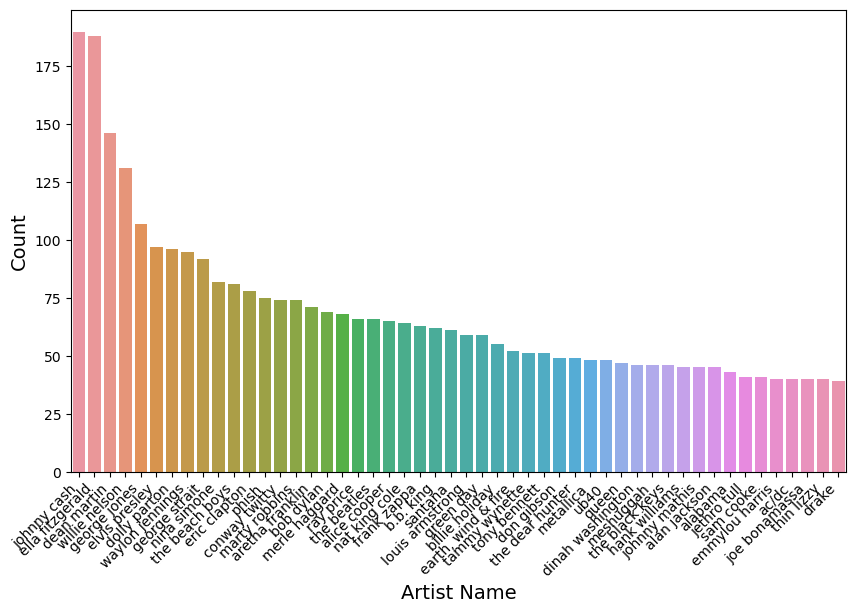

In [9]:
# Creating histogram to determine distribution of Artists- we found that johhny cash and ella fitzgerald are the most selected artists
artists = df_f['artist_name'].value_counts().head(50)
artists.reset_index()
plt.figure(figsize=[10, 6])
sns.barplot(x=artists.index, y=artists.values)
plt.xlabel('Artist Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
df_f.groupby("artist_name").count()

,Unnamed: 0,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
artist_name,,,,,,,,,,,,,,,,,,,,,
"""weird al"" yankovic",14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
$uicideboy$,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
'til tuesday,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
(hed) p.e.,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
*nsync,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ødyssee,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
željko bebek,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
дэфолиант,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


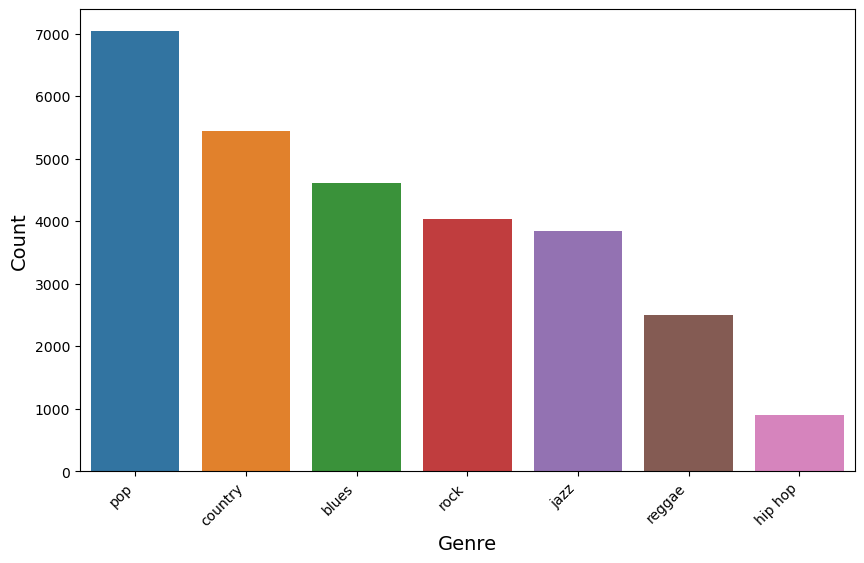

In [11]:
#Now lets compare the genre of her most popular selected artists- we found pop and country to be most selected genre
artists = df_f['genre'].value_counts().head(50)
artists.reset_index()
plt.figure(figsize=[10, 6])
sns.barplot(x=artists.index, y=artists.values)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

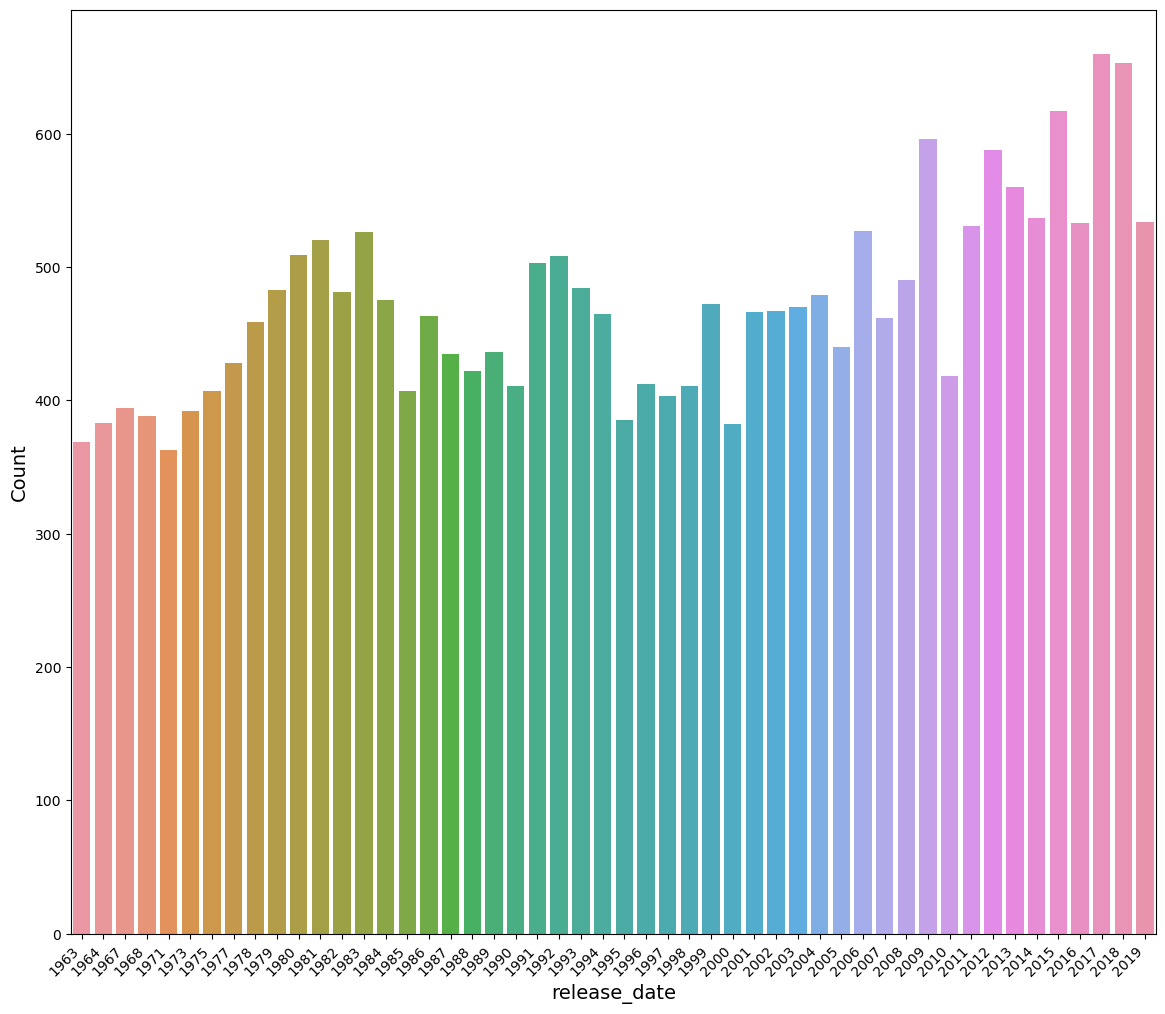

In [12]:
#Now lets compare the release date of her most popular selected artists- we found the realease date of 2017 and 2018 to be most selected
artists = df_f['release_date'].value_counts().head(50)
artists.reset_index()
plt.figure(figsize=[14, 12])
sns.barplot(x=artists.index, y=artists.values)
plt.xlabel('release_date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

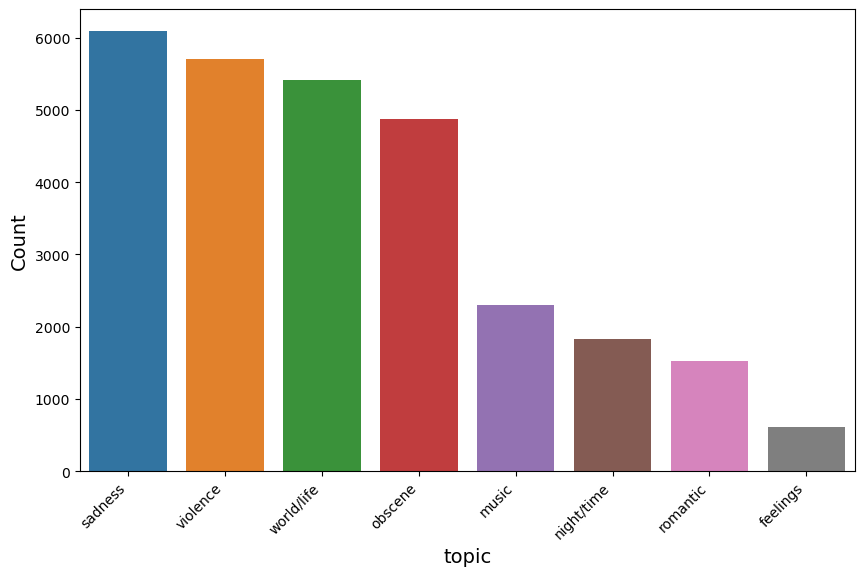

In [13]:
#Now lets compare the topic of her most popular selected artists- we found sadness and violence were most popular
artists = df_f['topic'].value_counts().head(50)
artists.reset_index()
plt.figure(figsize=[10, 6])
sns.barplot(x=artists.index, y=artists.values)
plt.xlabel('topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
Mostpopular_release_dates= df_f[(df_f['release_date'] <= 2018) & (df_f['release_date'] >= 2017)]

In [15]:
Mostpopular_release_dates[Mostpopular_release_dates['artist_name']== "johnny cash"]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age


In [16]:
Mostpopular_release_dates[Mostpopular_release_dates['artist_name']== "ella fitzgerald"]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
16965,53978,ella fitzgerald,glad to be unhappy,2018,blues,look run past sweat heart attack look shoulder...,78,0.000763,0.537218,0.000763,...,0.000763,0.000763,0.019789,0.000763,0.000763,0.193423,0.213738,0.000763,violence,0.028571
17002,54093,ella fitzgerald,you won't be satisfied (until you break my heart),2018,blues,satisfy break heart satisfy teardrops start tr...,40,0.041477,0.001754,0.001754,...,0.073188,0.001754,0.001754,0.001754,0.001754,0.001754,0.589632,0.001754,sadness,0.028571


In [17]:
Mostpopular_release_dates[Mostpopular_release_dates['genre']== "pop"]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
6738,19341,khalid,cold blooded,2017,pop,cold blood cold blood treat get hand walk like...,122,0.000537,0.691919,0.000537,...,0.000537,0.000537,0.000537,0.000537,0.000537,0.000537,0.026229,0.178422,violence,0.042857
6739,19344,a r i z o n a,oceans away,2017,pop,guard mess come high wear know need space wann...,80,0.000822,0.000822,0.000822,...,0.041117,0.000822,0.000822,0.000822,0.049565,0.000822,0.577276,0.042321,sadness,0.042857
6740,19346,harry styles,sign of the times,2017,pop,stop cry sign time welcome final wear best clo...,107,0.025532,0.000572,0.109177,...,0.041358,0.000572,0.000572,0.156376,0.000572,0.000572,0.319609,0.026350,sadness,0.042857
6741,19348,lana del rey,lust for life (with the weeknd),2017,pop,eye like pisces weak lock inside heartshaped w...,95,0.031667,0.344942,0.001422,...,0.001422,0.001422,0.001422,0.001422,0.001422,0.001422,0.267162,0.001422,violence,0.042857
6742,19357,khalid,keep me,2017,pop,roses favorite couldn stand scent take smile f...,88,0.000774,0.515207,0.089009,...,0.104259,0.000774,0.025111,0.000774,0.000774,0.000774,0.179381,0.000774,violence,0.042857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,20015,cardi b,ring (feat. kehlani),2018,pop,ring ring ring ring leave ring ring ring ring ...,137,0.062659,0.095477,0.026930,...,0.000474,0.066973,0.395907,0.130882,0.000474,0.000474,0.000474,0.032508,music,0.028571
6955,20017,famous dex,japan,2018,pop,know sayin like know sayin real haha diamonds ...,188,0.155481,0.000470,0.086779,...,0.034959,0.486000,0.013812,0.000470,0.000470,0.000470,0.000470,0.000470,obscene,0.028571
6956,20020,meek mill,24/7 (feat. ella mai),2018,pop,tell want yeah tell need yeah night talkin bou...,178,0.032948,0.000492,0.036367,...,0.138545,0.336264,0.014159,0.057881,0.000492,0.000492,0.020328,0.016530,obscene,0.028571
6957,20023,mark ronson,nothing breaks like a heart (feat. miley cyrus),2018,pop,world hurt cut deep leave scar things fall apa...,165,0.000346,0.000346,0.062073,...,0.000346,0.036259,0.000346,0.048449,0.198780,0.000346,0.541877,0.000346,sadness,0.028571


In [18]:
Mostpopular_release_dates[Mostpopular_release_dates['genre']== "country"]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
12273,38601,midland,this old heart,2017,country,drown givin good draggin live life like countr...,94,0.014281,0.000684,0.055287,...,0.000684,0.067803,0.030716,0.022020,0.018793,0.000684,0.381435,0.039715,sadness,0.042857
12274,38610,canaan smith,like you that way,2017,country,tick little heart shape right middle make attr...,112,0.082215,0.000566,0.057338,...,0.000566,0.334720,0.021066,0.020903,0.000566,0.000566,0.013536,0.000566,obscene,0.042857
12275,38612,old dominion,a girl is a gun,2017,country,innocent buy drink get load know danger cause ...,123,0.000585,0.067609,0.000585,...,0.084477,0.301609,0.000585,0.000585,0.000585,0.000585,0.111916,0.092355,obscene,0.042857
12276,38643,brett young,memory won't let me,2017,country,friends move time see smile go memory pretty p...,84,0.000693,0.000693,0.000693,...,0.215865,0.000693,0.044680,0.000693,0.000693,0.000693,0.484264,0.077738,sadness,0.042857
12277,38651,chase rice,on tonight,2017,country,little dress hang hanger wear feel dangerous s...,93,0.000666,0.000666,0.000666,...,0.000666,0.000666,0.031118,0.155115,0.000666,0.000666,0.000666,0.000666,night/time,0.042857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12405,39336,brandon lay,yada yada yada,2018,country,subdivision turnin tunnel vision yeah radio li...,129,0.101626,0.000627,0.000627,...,0.000627,0.404102,0.028473,0.210229,0.069218,0.000627,0.000627,0.000627,obscene,0.028571
12406,39341,brandon ratcliff,rules of breaking up,2018,country,see cause gotta space friends work tell think ...,119,0.000474,0.058234,0.131295,...,0.144304,0.000474,0.047125,0.021621,0.000474,0.000474,0.353500,0.043209,sadness,0.028571
12407,39350,kenny chesney,ends of the earth,2018,country,river wind forever gonna lead mountain mount g...,85,0.018324,0.000835,0.346007,...,0.091055,0.000835,0.000835,0.000835,0.170002,0.079291,0.000835,0.016880,world/life,0.028571
12408,39351,eric church,hippie radio,2018,country,daddy pontiac beigeer yellow young little fell...,110,0.060344,0.037810,0.000702,...,0.000702,0.030796,0.300808,0.294629,0.035459,0.059472,0.062603,0.000702,music,0.028571


In [19]:
Mostpopular_release_dates[Mostpopular_release_dates['topic']== "sadness"]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
6739,19344,a r i z o n a,oceans away,2017,pop,guard mess come high wear know need space wann...,80,0.000822,0.000822,0.000822,...,0.041117,0.000822,0.000822,0.000822,0.049565,0.000822,0.577276,0.042321,sadness,0.042857
6740,19346,harry styles,sign of the times,2017,pop,stop cry sign time welcome final wear best clo...,107,0.025532,0.000572,0.109177,...,0.041358,0.000572,0.000572,0.156376,0.000572,0.000572,0.319609,0.026350,sadness,0.042857
6745,19367,dean lewis,waves,2017,pop,swell catch middle take control person think k...,111,0.091886,0.056930,0.000532,...,0.000532,0.000532,0.000532,0.000532,0.095927,0.078934,0.423106,0.125450,sadness,0.042857
6746,19368,taylor swift,getaway car,2017,pop,good start getaway best time worst crimes stri...,165,0.000598,0.062481,0.000598,...,0.318765,0.145382,0.000598,0.000598,0.029278,0.021499,0.346299,0.043990,sadness,0.042857
6747,19369,yoke lore,truly madly deeply,2017,pop,dream wish fantasy need breath truly madly dee...,78,0.030856,0.000863,0.061180,...,0.000863,0.000863,0.000863,0.000863,0.161028,0.020123,0.382034,0.000863,sadness,0.042857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27368,80733,breaking benjamin,blood,2018,rock,endless word sick tire hat break sick fuck tir...,20,0.002770,0.352407,0.002770,...,0.002770,0.066458,0.002770,0.002770,0.002770,0.002770,0.393020,0.002770,sadness,0.028571
27373,80749,three days grace,right left wrong,2018,rock,wanna away away away wanna disappear away come...,27,0.121348,0.001949,0.001949,...,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.375038,0.001949,sadness,0.028571
27380,80759,bastille,quarter past midnight,2018,rock,quarter past midnight city yeah yeah yeah stre...,152,0.000435,0.000435,0.096391,...,0.000435,0.000435,0.010315,0.118072,0.179164,0.000435,0.357980,0.000435,sadness,0.028571
28003,81908,nate dogg,backdoor,2017,hip hop,days lonely days lonely nights cold nights col...,50,0.064835,0.001350,0.120630,...,0.001350,0.001350,0.230745,0.001350,0.001350,0.001350,0.387352,0.001350,sadness,0.042857


In [20]:
Mostpopular_release_dates[Mostpopular_release_dates['topic']== "violence"]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
6738,19341,khalid,cold blooded,2017,pop,cold blood cold blood treat get hand walk like...,122,0.000537,0.691919,0.000537,...,0.000537,0.000537,0.000537,0.000537,0.000537,0.000537,0.026229,0.178422,violence,0.042857
6741,19348,lana del rey,lust for life (with the weeknd),2017,pop,eye like pisces weak lock inside heartshaped w...,95,0.031667,0.344942,0.001422,...,0.001422,0.001422,0.001422,0.001422,0.001422,0.001422,0.267162,0.001422,violence,0.042857
6742,19357,khalid,keep me,2017,pop,roses favorite couldn stand scent take smile f...,88,0.000774,0.515207,0.089009,...,0.104259,0.000774,0.025111,0.000774,0.000774,0.000774,0.179381,0.000774,violence,0.042857
6757,19398,yoke lore,beige,2017,pop,wanna smile want morning perform tell know lea...,65,0.045404,0.318058,0.001012,...,0.176787,0.001012,0.001012,0.092388,0.001012,0.001012,0.114471,0.044094,violence,0.042857
6771,19453,migos,kelly price (feat. travis scott),2017,pop,tracklist look xxxtentacion tshirt migos gucci...,69,0.002924,0.343397,0.179587,...,0.002924,0.156396,0.002924,0.002924,0.002924,0.002924,0.002924,0.055150,violence,0.042857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28128,82105,busta rhymes,why we die (feat. dmx and jay z),2017,hip hop,darkness come closer home follow night sleep l...,58,0.001120,0.495319,0.151106,...,0.001120,0.001120,0.001120,0.083252,0.130062,0.051066,0.001120,0.001120,violence,0.042857
28139,82122,nappy roots,headz up,2018,hip hop,head silly head shawty head head shawty head k...,86,0.001316,0.550538,0.001316,...,0.170095,0.079620,0.001316,0.001316,0.001316,0.001316,0.001316,0.001316,violence,0.028571
28167,82163,talib kweli,ny weather report,2018,hip hop,come yeah like opportunity thank everybody rid...,103,0.000774,0.327265,0.033128,...,0.000774,0.053441,0.107520,0.195229,0.071530,0.140322,0.000774,0.000774,violence,0.028571
28174,82173,hiphop tamizha,vaadi nee vaa,2018,hip hop,couldn stand weather know rain thunder hill va...,101,0.000892,0.393803,0.000892,...,0.400713,0.000892,0.000892,0.000892,0.032638,0.000892,0.000892,0.000892,violence,0.028571


In [21]:
df_f['topic'] == "sadness"

0         True
1        False
2        False
3        False
4        False
         ...  
28357    False
28358    False
28359    False
28360    False
28361    False
Name: topic, Length: 28362, dtype: bool

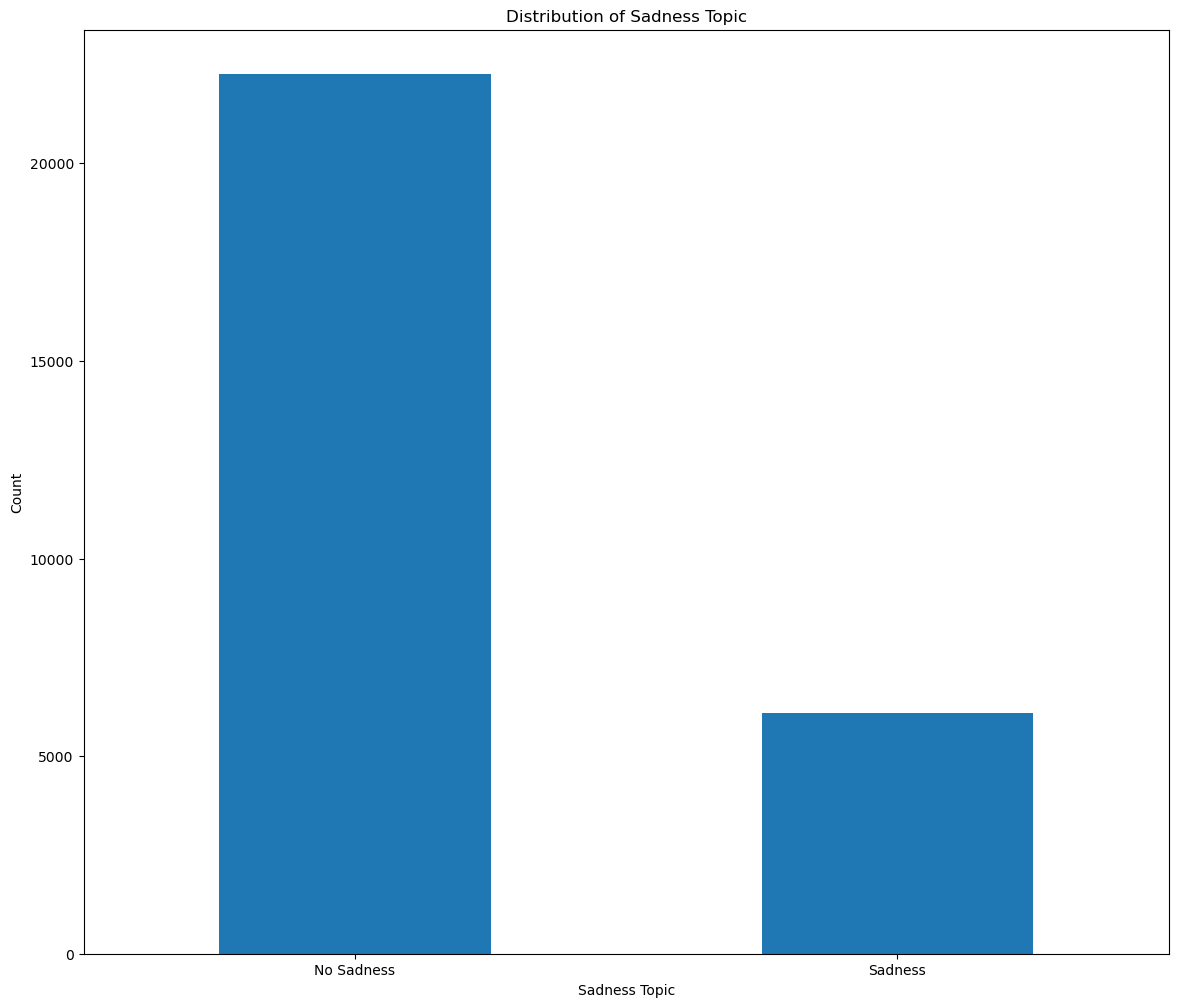

In [22]:
# Creating histogram to determine distribution of topic sadness
sadness_topic = df_f['topic'] == 'sadness'
sadness_counts = sadness_topic.value_counts()
plt.figure(figsize=(14, 12))
sadness_counts.plot(kind='bar')
plt.title('Distribution of Sadness Topic')
plt.xlabel('Sadness Topic')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Sadness', 'Sadness'], rotation=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

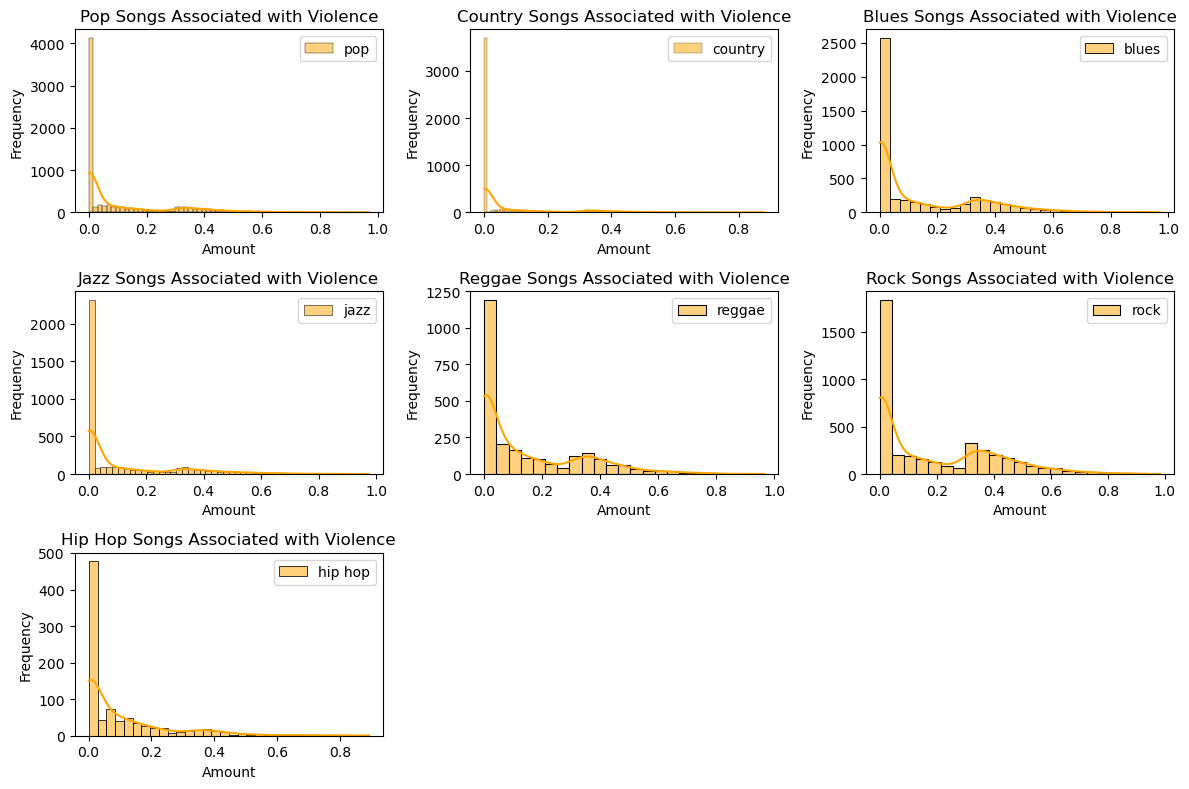

In [23]:
# Set up the figure and subplots
fig, axes = plt. subplots(3, 3, figsize=(12, 8))
axes = axes. flatten()
# Create a histogram for each genre
for i, genre in enumerate(df_f['genre']. unique()):
    sns.histplot(df_f[df_f['genre'] == genre]['violence'], kde=True, label=genre, ax=axes[i], color="orange")
    axes[i].set_title(f'{genre.title()} Songs Associated with Violence') 
    axes[i].set_xlabel('Amount')
    axes[i].set_ylabel('Frequency')
    axes[i].legend( )
# Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')
plt.tight_layout()
plt.show

/var/folders/f_/f5gxqd811s30ss_891r0l84w0000gn/T/ipykernel_78914/3200480925.py:15: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from current font.
  plt.tight_layout()
/var/folders/f_/f5gxqd811s30ss_891r0l84w0000gn/T/ipykernel_78914/3200480925.py:15: UserWarning: Glyph 38706 (\N{CJK UNIFIED IDEOGRAPH-9732}) missing from current font.
  plt.tight_layout()
/var/folders/f_/f5gxqd811s30ss_891r0l84w0000gn/T/ipykernel_78914/3200480925.py:15: UserWarning: Glyph 24429 (\N{CJK UNIFIED IDEOGRAPH-5F6D}) missing from current font.
  plt.tight_layout()
/var/folders/f_/f5gxqd811s30ss_891r0l84w0000gn/T/ipykernel_78914/3200480925.py:15: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  plt.tight_layout()
/var/folders/f_/f5gxqd811s30ss_891r0l84w0000gn/T/ipykernel_78914/3200480925.py:15: UserWarning: Glyph 40599 (\N{CJK UNIFIED IDEOGRAPH-9E97}) missing from current font.
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

/Users/zenasawaged/anaconda3/envs/phase1/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from current font.
  func(*args, **kwargs)
/Users/zenasawaged/anaconda3/envs/phase1/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 38706 (\N{CJK UNIFIED IDEOGRAPH-9732}) missing from current font.
  func(*args, **kwargs)
/Users/zenasawaged/anaconda3/envs/phase1/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24429 (\N{CJK UNIFIED IDEOGRAPH-5F6D}) missing from current font.
  func(*args, **kwargs)
/Users/zenasawaged/anaconda3/envs/phase1/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  func(*args, **kwargs)
/Users/zenasawaged/anaconda3/envs/phase1/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 40599 (\N{CJK UNIFIED IDEOGRAPH-9E97}) missing from current font.

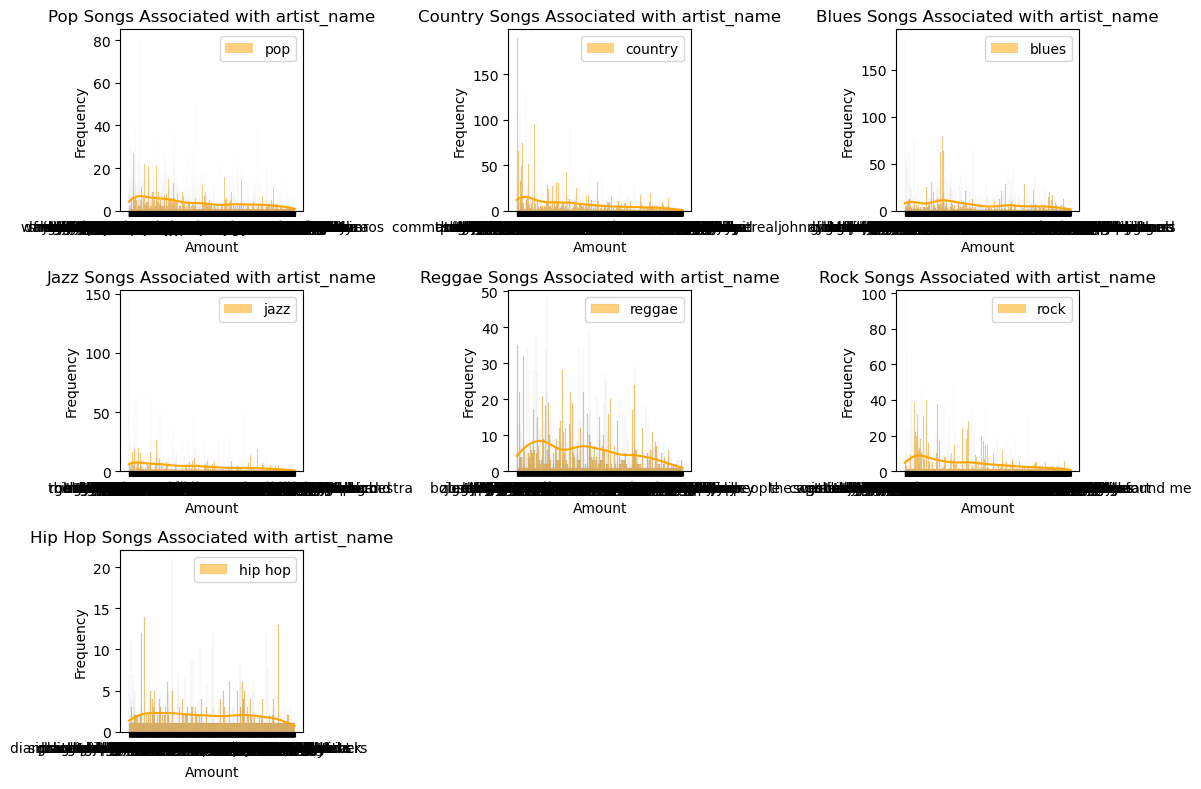

In [24]:
# Set up the figure and subplots
fig, axes = plt. subplots(3, 3, figsize=(12, 8))
axes = axes. flatten()
# Create a histogram for each genre
for i, genre in enumerate(df_f['genre']. unique()):
    sns.histplot(df_f[df_f['genre'] == genre]['artist_name'], kde=True, label=genre, ax=axes[i], color="orange")
    axes[i].set_title(f'{genre.title()} Songs Associated with artist_name') 
    axes[i].set_xlabel('Amount')
    axes[i].set_ylabel('Frequency')
    axes[i].legend( )
# Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

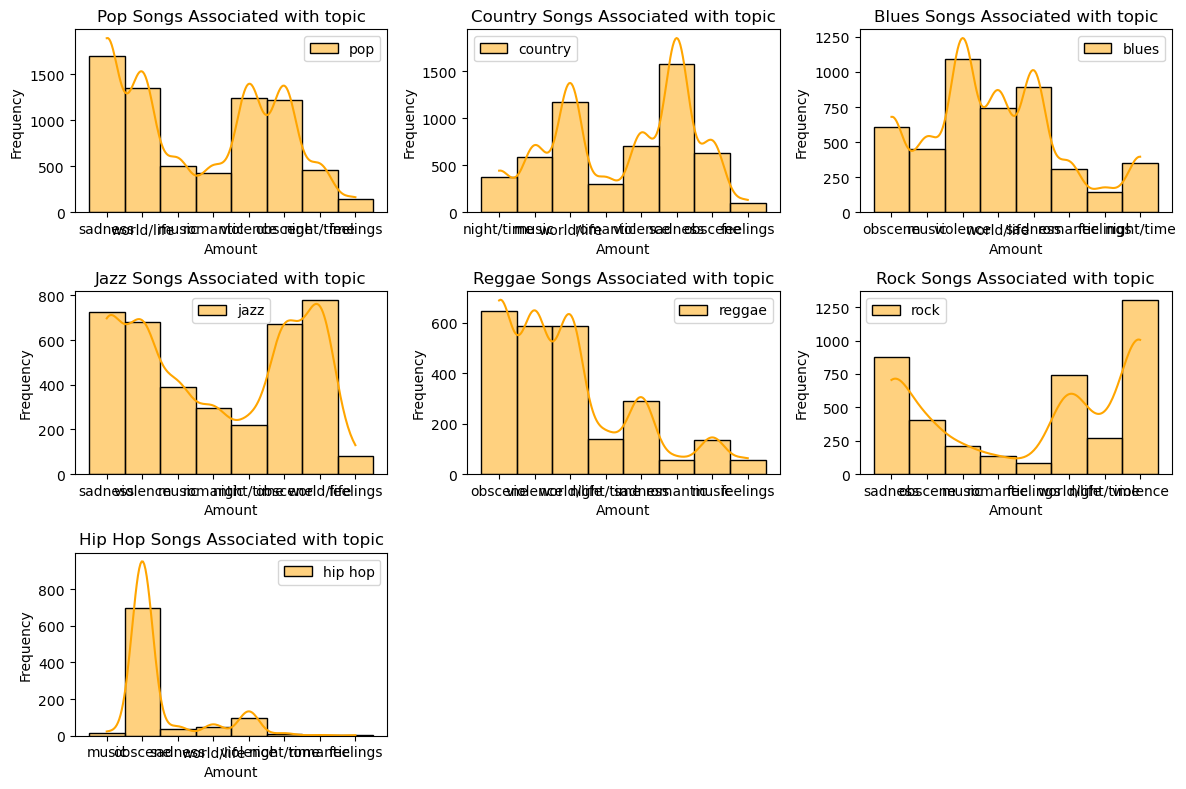

In [25]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()
# Create a histogram for each genre
for i, genre in enumerate(df_f['genre']. unique()):
    sns.histplot(df_f[df_f['genre'] == genre]['topic'], kde=True, label=genre, ax=axes[i], color="orange")
    axes[i].set_title(f'{genre.title()} Songs Associated with topic') 
    axes[i].set_xlabel('Amount')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
# Remove empty subplots
for ax in axes.flatten():
    if not ax.lines:
        ax.axis('off')
plt.tight_layout()
plt.show

<Axes: xlabel='genre', ylabel='count'>

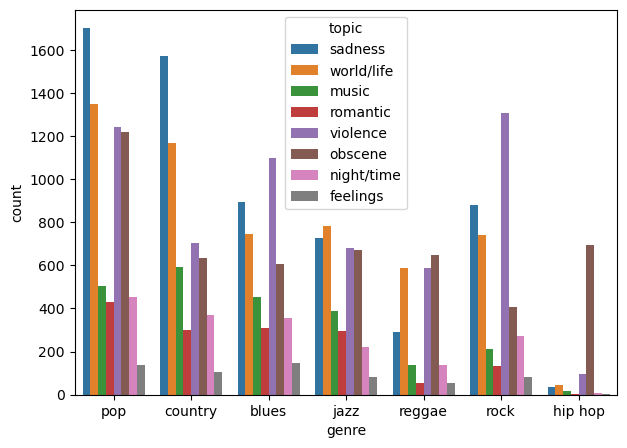

In [26]:
# we can see that sadness is the greatest topic amongst the most popular genre's
plt.figure(figsize=(7,5))
sns.countplot(data = df_f, x ="genre", hue = 'topic')

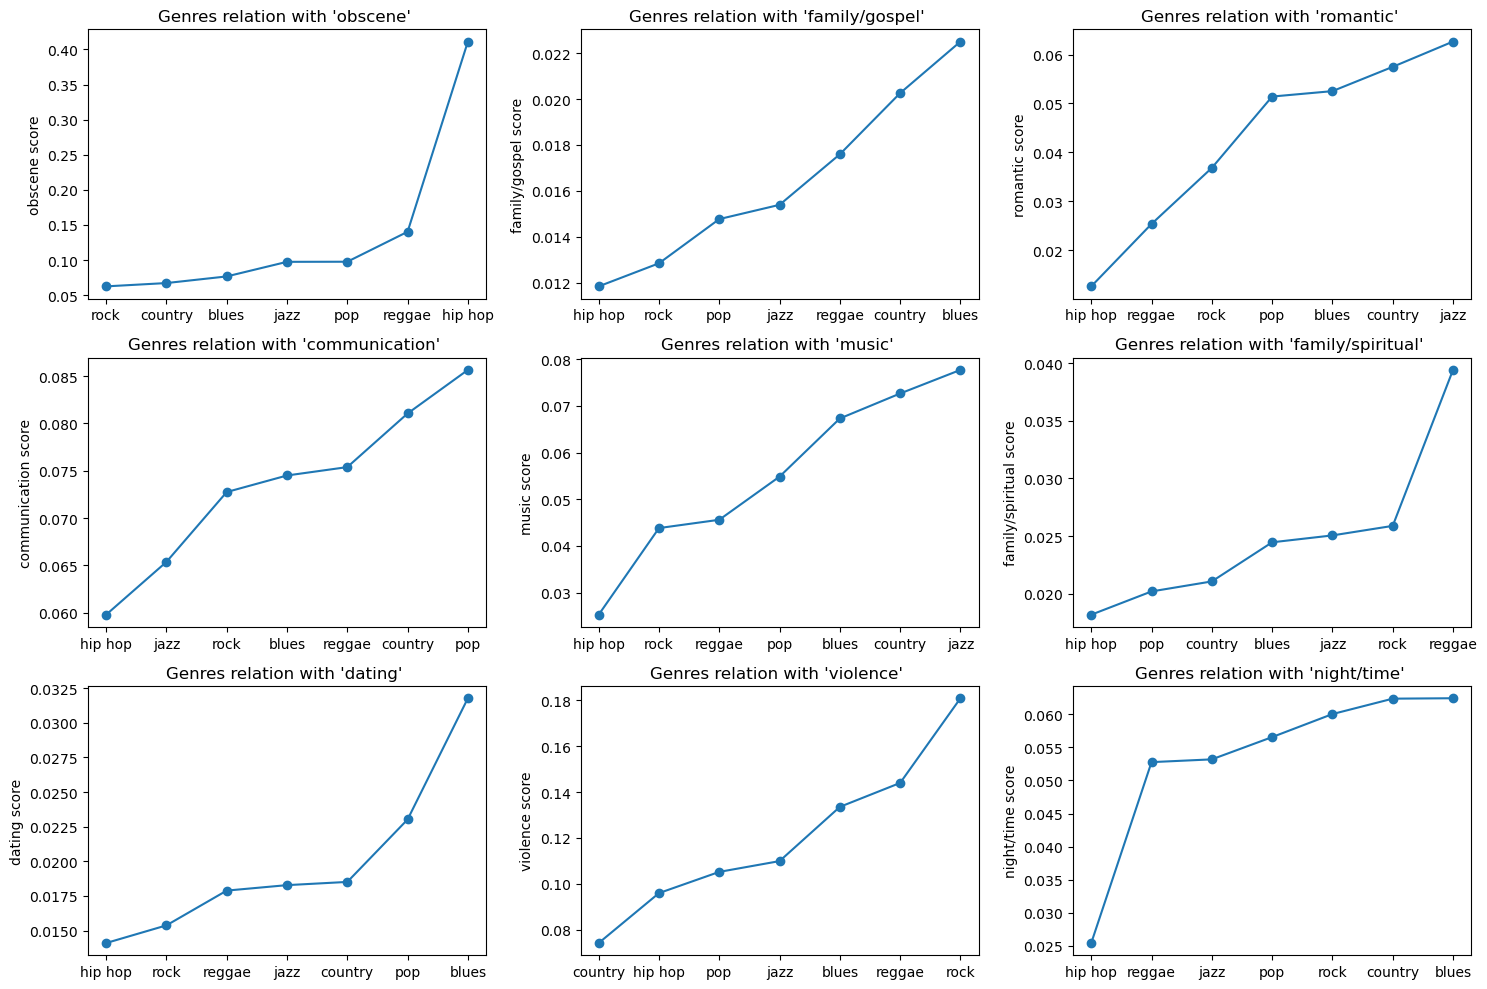

In [27]:
# setting up figure, and subplots
fig, axes = plt.subplots(3,3, figsize=(15,10))
types = ['obscene', 'family/gospel', 'romantic', 'communication', 'music', 'family/spiritual', 'dating', 'violence', 'night/time']  
for i, feature in enumerate(types):
    row, col = i//3 , i%3
    genre = df_f.groupby('genre') [feature].mean().sort_values().index
    values = df_f.groupby('genre') [feature].mean().sort_values().values
    axes[row,col].plot(genre, values, marker='o', linestyle='-') 
    axes[row,col].set_title("Genres relation with '{}' ".format(feature))
    axes[row,col].set_ylabel('{} score'.format(feature))
plt.tight_layout()

In [28]:
df_f.dtypes

Unnamed: 0                    int64
artist_name                  object
track_name                   object
release_date                  int64
genre                        object
lyrics                       object
len                           int64
dating                      float64
violence                    float64
world/life                  float64
night/time                  float64
shake the audience          float64
family/gospel               float64
romantic                    float64
communication               float64
obscene                     float64
music                       float64
movement/places             float64
light/visual perceptions    float64
family/spiritual            float64
sadness                     float64
feelings                    float64
topic                        object
age                         float64
dtype: object

In [29]:
numerical_df=df_f.drop(['artist_name','lyrics','track_name','genre', 'topic', 'Unnamed: 0'], axis=1)

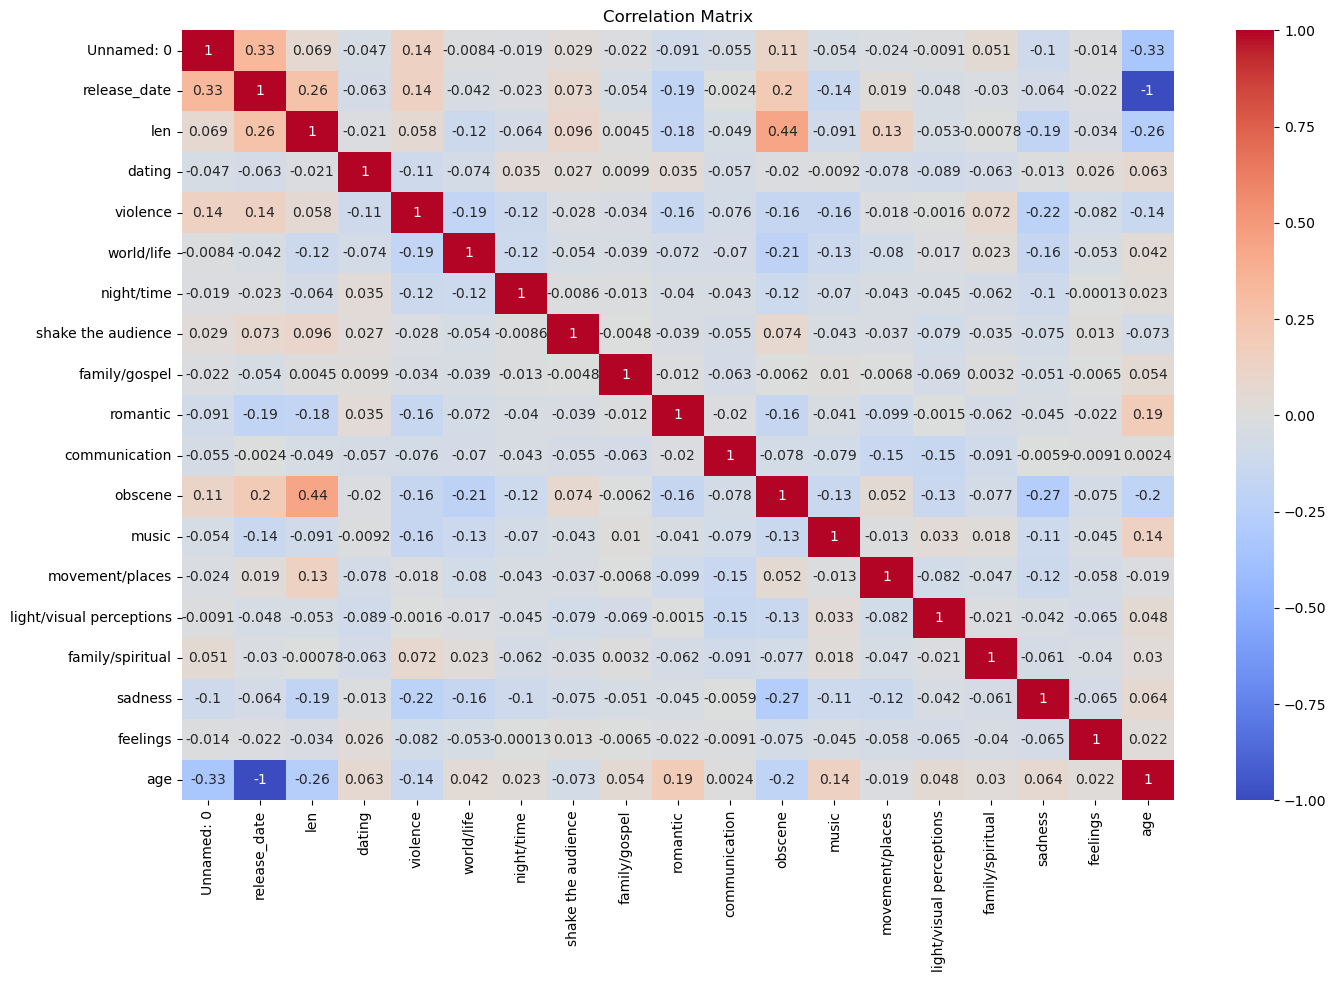

In [30]:
#Heatmap of the correlation matrix
correlation_matrix = df_f.corr(numeric_only=True)
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

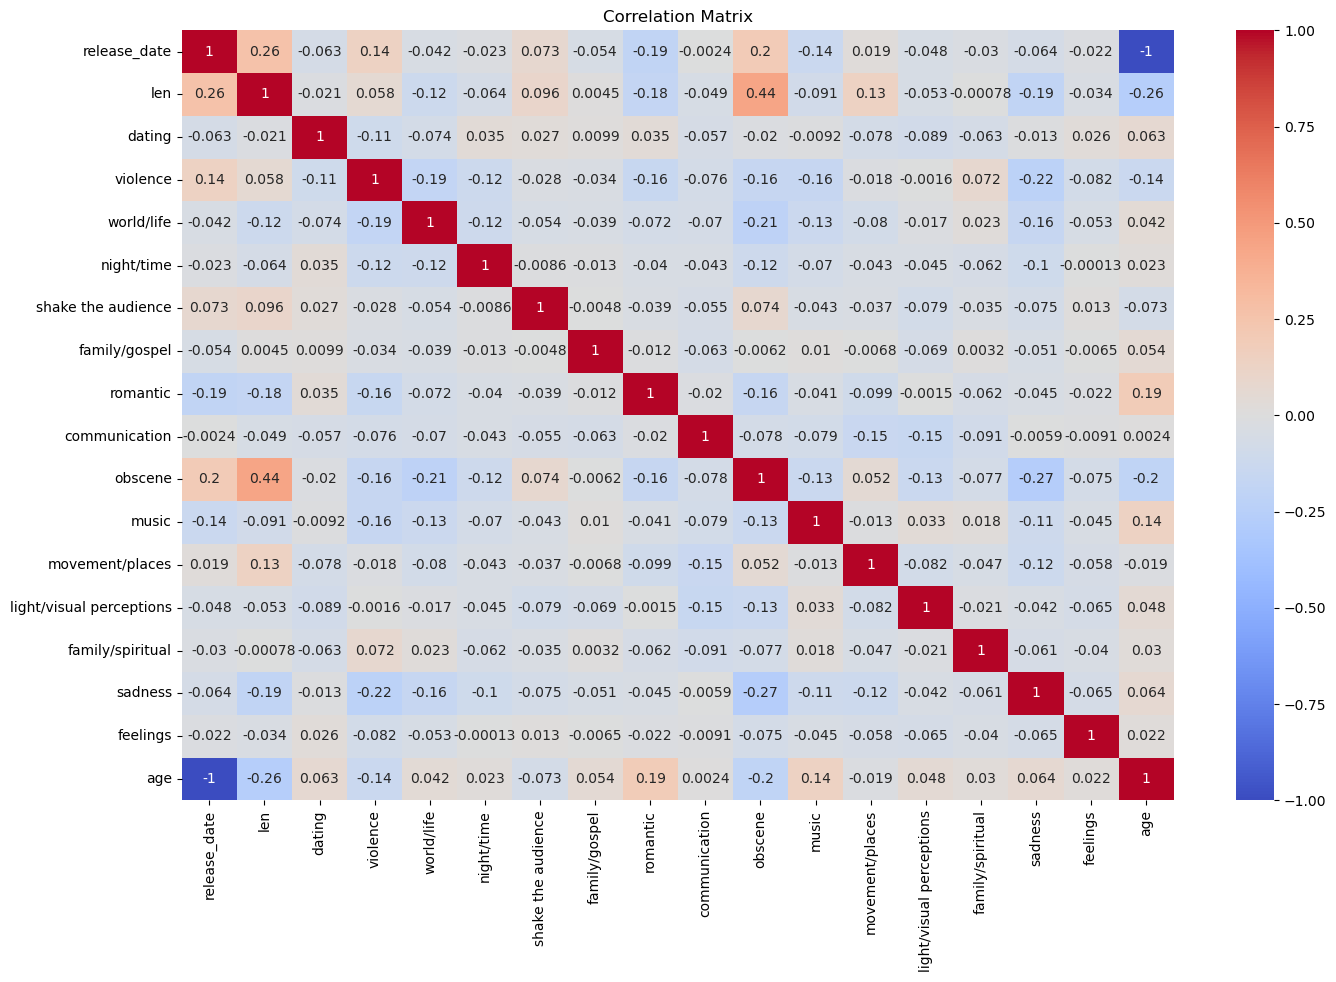

In [32]:
#Heatmap of the correlation matrix
correlation_matrix = numerical_df.corr(numeric_only=True)
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()